# 1. Load libraries and dataset

In [1]:

import warnings
warnings.filterwarnings("ignore")


In [2]:
import pandas as pd
import numpy as np
import re
import nltk
import seaborn as sns
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from gensim.models import Word2Vec, FastText
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC


In [3]:
nltk.download('punkt' ,quiet=True)
nltk.download('stopwords',quiet=True)

True

Kaggle Datasets is one of the best sources to get a clean dataset for this notebook I will be using [Twitter US Airline Sentiment](https://www.kaggle.com/crowdflower/twitter-airline-sentiment) dataset.


In [4]:
data = pd.read_csv('train_data.csv')

# 2. Initial Data Exploration

In [6]:
data.head()

,text,label
0,Here are Thursday's biggest analyst calls: App...,0
1,Buy Las Vegas Sands as travel to Singapore bui...,0
2,"Piper Sandler downgrades DocuSign to sell, cit...",0
3,"Analysts react to Tesla's latest earnings, bre...",0
4,Netflix and its peers are set for a ‘return to...,0


In [34]:
word_counts = [len(doc.split()) for doc in data['text']]
print(word_counts)
# Output: [3, 5, 8]


[15, 13, 13, 15, 19, 12, 13, 17, 12, 19, 19, 14, 19, 16, 10, 14, 17, 16, 12, 36, 12, 16, 18, 12, 12, 15, 13, 10, 45, 17, 15, 16, 14, 15, 12, 15, 16, 12, 14, 15, 14, 16, 16, 17, 47, 11, 19, 9, 14, 12, 15, 19, 17, 16, 13, 18, 13, 41, 16, 17, 16, 18, 11, 23, 18, 20, 15, 13, 9, 12, 23, 10, 15, 16, 10, 14, 17, 24, 22, 11, 13, 12, 16, 12, 16, 12, 11, 13, 15, 16, 33, 36, 14, 16, 20, 16, 11, 15, 14, 14, 13, 13, 11, 13, 17, 16, 16, 17, 16, 13, 14, 14, 16, 16, 18, 14, 15, 17, 14, 19, 13, 16, 13, 14, 12, 15, 17, 13, 16, 14, 15, 16, 14, 23, 14, 14, 23, 16, 14, 16, 17, 16, 18, 20, 16, 10, 16, 16, 16, 15, 15, 19, 15, 14, 15, 14, 14, 12, 13, 11, 16, 15, 12, 13, 13, 14, 16, 18, 12, 9, 15, 15, 12, 17, 17, 15, 14, 12, 13, 16, 17, 13, 12, 18, 15, 16, 11, 14, 12, 12, 14, 13, 13, 12, 14, 16, 17, 14, 9, 13, 17, 14, 16, 11, 13, 13, 30, 13, 10, 14, 31, 19, 15, 23, 16, 37, 15, 16, 16, 16, 16, 15, 16, 16, 15, 12, 12, 26, 14, 29, 13, 27, 45, 12, 27, 13, 27, 33, 19, 17, 36, 11, 41, 20, 12, 11, 14, 8, 14, 25, 20, 

In [7]:
data['label'].value_counts()

2     3545
18    2118
14    1822
9     1557
5      987
16     985
1      837
19     823
7      624
6      524
15     501
17     495
12     487
13     471
4      359
3      321
0      255
8      166
10      69
11      44
Name: label, dtype: int64

## data imbalance

<AxesSubplot:xlabel='label', ylabel='count'>

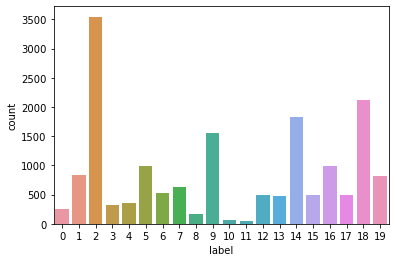

In [9]:
sns.countplot(x = "label", data = data)

In [10]:
# Rename columns if needed (just to be safe)
X = data['text']
y = data['label']

**Preprocessing utk TF-IDF dan BOW**

In [11]:
stop_words = set(stopwords.words('english'))
X_clean_for_bow = []
for text in X:
     # Hapus angka
    text = re.sub(r"\d+", "", text)
    # Hapus simbol / non-word characters
    text = re.sub(r"[^\w]", " ", text)
    # Hapus spasi berlebih
    text = re.sub(r"\s+", " ", text).strip()
    # Tokenisasi
    tokens = word_tokenize(text)
    # Hapus stopwords dan kata sangat pendek
    tokens = [w for w in tokens if w not in stop_words and len(w) > 1]
    # Gabung kembali menjadi string
    X_clean_for_bow.append(" ".join(tokens))

**Preprocessing utk word embedding**

In [12]:
X_tokens_for_embedding = []
for text in X:
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text).lower()
    tokens = word_tokenize(text)
    X_tokens_for_embedding.append(tokens)

*Cek shape and head*  
  
  
TF-IDF dan BOW: List string per dokumen  
Word embedding: List token per dokumen

In [17]:
print("BOW / TF-IDF cleaned text (head):\n")
print(X_clean_for_bow[:1])
print("\nWord Embedding tokens (head):")
print(X_tokens_for_embedding[:1])


BOW / TF-IDF cleaned text (head):

['Here Thursday biggest analyst calls Apple Amazon Tesla Palantir DocuSign Exxon amp https co QPNGwlUh']

Word Embedding tokens (head):
[['here', 'are', 'thursdays', 'biggest', 'analyst', 'calls', 'apple', 'amazon', 'tesla', 'palantir', 'docusign', 'exxon', 'amp', 'more']]


# 2. SPLIT data

In [18]:
X_train_BT, X_test_BT, y_train, y_test = train_test_split(X_clean_for_bow, y, test_size=0.2, random_state=42)
X_train_tokens, X_test_tokens, y_train_tokens, y_test_tokens= train_test_split(X_tokens_for_embedding, y, test_size=0.2, random_state=42)
print("\nUkuran Data:")
print("Train:", len(X_train_BT), " | Test:", len(X_test_BT))

print("Train:", len(X_train_tokens), " | Test:", len(X_test_tokens))


Ukuran Data:
Train: 13592  | Test: 3398
Train: 13592  | Test: 3398


# 3. BoW

input BoW dan TF-iDF adalah List atau Series of strings.    
List string per dokumen

In [19]:
bow = CountVectorizer(max_features=7000)
X_train_bow = bow.fit_transform(X_train_BT)
X_test_bow = bow.transform(X_test_BT)

# cek ukuran matriks dan jumlah kata unik
print("\n===== BAG OF WORDS =====")
print("Jumlah kata unik/vocab:", len(bow.vocabulary_))
print("Beberapa vocab:", list(bow.vocabulary_.keys())[:20])


===== BAG OF WORDS =====
Jumlah kata unik/vocab: 7000
Beberapa vocab: ['us', 'bank', 'stocks', 'jumped', 'nearly', 'two', 'months', 'friday', 'citigroup', 'strong', 'second', 'quarter', 'results', 'helping', 'lift', 'sentiment', 'entire', 'sector', 'https', 'co']


# 4. TF-IDF

In [20]:
tfidf = TfidfVectorizer(max_features=7000, ngram_range=(1,2))  # unigram + bigram
X_train_tfidf = tfidf.fit_transform(X_train_BT)
X_test_tfidf = tfidf.transform(X_test_BT)

print("\n===== TF-IDF =====")
print("Shape (train):", X_train_tfidf.shape)
print("Jumlah kata unik/vocab:", len(tfidf.vocabulary_))
print("Beberapa vocab:", list(tfidf.vocabulary_.keys())[:20])


===== TF-IDF =====
Shape (train): (13592, 7000)
Jumlah kata unik/vocab: 7000
Beberapa vocab: ['us', 'bank', 'stocks', 'jumped', 'nearly', 'two', 'months', 'friday', 'citigroup', 'strong', 'second', 'quarter', 'results', 'helping', 'lift', 'sentiment', 'entire', 'sector', 'https', 'co']


# 5. Word2Vec

melatih model dari awal, punya atribut wv utk word2vec dan fasttext; pakai pretrained model    KeyedVectors.load_word2vec_format(), maka objeknya langsung bertipe KeyedVectors, jadi tidak perlu .wv

In [21]:
# Word2Vec
print('Training Word2Vec...')
w2v_model = Word2Vec(sentences=X_train_tokens , vector_size=100, window=5, min_count=2, workers=4)


Training Word2Vec...


Word Embedding: per token  
ML tradisional: butuh per dokumen, sehingga diperlukan rata-rata token --> 'utuh' per dokumen  
Itu sebabnya X_train_w2v dan X_test_w2v adalah array [n_samples x vector_size]

In [22]:
# Rata-rata vektor kata per dokumen
def avg_vector(tokens, model):
    vectors = [model.wv[word] for word in tokens if word in model.wv]
    if len(vectors) == 0:
        return np.zeros(model.vector_size)
    return np.mean(vectors, axis=0)

In [23]:
#CONVERT TEXT TO VECTORS
# Representasi dokumen rata-rata embedding
X_train_w2v = np.array([avg_vector(t, w2v_model) for t in X_train_tokens])
X_test_w2v  = np.array([avg_vector(t, w2v_model) for t in X_test_tokens])


print("Shape X_train Word2Vec:", X_train_w2v.shape)
print("Jumlah kata unik di Word2Vec:", len(w2v_model.wv))
print("Beberapa vocab:", list(w2v_model.wv.key_to_index.keys())[:20])


Shape X_train Word2Vec: (13592, 100)
Jumlah kata unik di Word2Vec: 11211
Beberapa vocab: ['the', 'to', 'of', 'a', 'in', 'and', 'for', 'on', 'is', 'as', 'with', 'its', 'by', 'us', 'from', 'at', 'new', 'that', 'are', 'earnings']


**pre-trained**

# GLOVE

In [24]:
import gensim.downloader as api
glove = api.load("glove-twitter-50")

In [25]:
def get_vector(tokens):
    # ambil hanya kata yang ada di vocab GloVe
    words = [w for w in tokens if w in glove]
    if not words:  # kalau tidak ada kata valid
        return np.zeros(glove.vector_size) ## kembalikan vektor nol
    # rata-rata semua vektor kata di kalimat
    return np.mean([glove[w] for w in words], axis=0)

# ubah seluruh data train dan test ke bentuk vektor
X_train_vec = np.array([get_vector(t) for t in X_train_tokens ])
X_test_vec  = np.array([get_vector(t) for t in X_test_tokens ])

# FastText

In [26]:
print('\nTraining FastText...')
model_ft = FastText(sentences=X_train_tokens , vector_size=100, window=5, min_count=2, sg=1, workers=4, epochs=10 )
#model_ft.save("fasttext_airline.model")
ft = model_ft.wv

#CONVERT TEXT TO VECTORS
X_train_ft = np.array([avg_vector(t, model_ft) for t in X_train_tokens])
X_test_ft = np.array([avg_vector(t, model_ft) for t in X_test_tokens])


Training FastText...


In [27]:
print("\n===== FASTTEXT =====")
print("Jumlah kata unik di FastText:", len(model_ft.wv))
print("Beberapa vocab:", list(model_ft.wv.key_to_index.keys())[:20])


===== FASTTEXT =====
Jumlah kata unik di FastText: 11211
Beberapa vocab: ['the', 'to', 'of', 'a', 'in', 'and', 'for', 'on', 'is', 'as', 'with', 'its', 'by', 'us', 'from', 'at', 'new', 'that', 'are', 'earnings']


# Machine learning model

**SVM BOW**

In [28]:
print("Training SVM (non-balanced)...\n")
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train_bow, y_train)
preds_bow = svm.predict(X_test_bow)
print(classification_report(y_test, preds_bow))

Training SVM (non-balanced)...

              precision    recall  f1-score   support

           0       0.66      0.55      0.60        49
           1       0.86      0.85      0.86       193
           2       0.77      0.87      0.81       690
           3       0.87      0.71      0.78        73
           4       0.99      0.93      0.95        80
           5       0.87      0.97      0.91       205
           6       0.87      0.85      0.86       107
           7       0.90      0.82      0.86       125
           8       0.63      0.63      0.63        30
           9       0.69      0.72      0.71       319
          10       0.94      0.79      0.86        19
          11       0.86      0.75      0.80         8
          12       0.90      0.78      0.84        93
          13       0.81      0.56      0.66        96
          14       0.81      0.82      0.81       366
          15       0.77      0.72      0.75        90
          16       0.92      0.83      0.87      

**SVM TF-IDF**

In [29]:
print("Training SVM (non-balanced)...\n")
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train_tfidf, y_train)
preds_tfidf = svm.predict(X_test_tfidf)
print(classification_report(y_test, preds_tfidf))

Training SVM (non-balanced)...

              precision    recall  f1-score   support

           0       0.82      0.55      0.66        49
           1       0.89      0.84      0.86       193
           2       0.75      0.89      0.81       690
           3       0.85      0.70      0.77        73
           4       0.99      0.88      0.93        80
           5       0.89      0.98      0.93       205
           6       0.83      0.84      0.84       107
           7       0.96      0.80      0.87       125
           8       0.83      0.67      0.74        30
           9       0.71      0.72      0.71       319
          10       0.92      0.58      0.71        19
          11       0.86      0.75      0.80         8
          12       0.91      0.74      0.82        93
          13       0.86      0.52      0.65        96
          14       0.80      0.82      0.81       366
          15       0.86      0.78      0.82        90
          16       0.90      0.86      0.88      

**SVM Word2Vec**

In [30]:
print("\n=== Training SVM Word2Vec ===")
svm_w2v = SVC(kernel='linear', class_weight='balanced', random_state=42)
svm_w2v.fit(X_train_w2v , y_train)
pred_w2v = svm_w2v.predict(X_test_w2v)
print(classification_report(y_test, pred_w2v))


=== Training SVM Word2Vec ===
              precision    recall  f1-score   support

           0       0.08      0.49      0.14        49
           1       0.56      0.49      0.52       193
           2       0.66      0.24      0.35       690
           3       0.07      0.08      0.07        73
           4       0.93      0.86      0.90        80
           5       0.83      0.83      0.83       205
           6       0.30      0.43      0.35       107
           7       0.71      0.70      0.71       125
           8       0.07      0.37      0.12        30
           9       0.34      0.40      0.37       319
          10       0.02      0.11      0.04        19
          11       0.02      0.25      0.03         8
          12       0.27      0.42      0.33        93
          13       0.16      0.40      0.23        96
          14       0.58      0.23      0.33       366
          15       0.38      0.40      0.39        90
          16       0.38      0.54      0.44       

**SVM GLOVE**

In [31]:
print("\n=== Training SVM FastText ===")
svm_ft = SVC(kernel='linear', class_weight='balanced', random_state=42)
svm_ft.fit(X_train_vec, y_train)
pred_glove = svm_ft.predict(X_test_vec)
print(classification_report(y_test, pred_glove))


=== Training SVM FastText ===
              precision    recall  f1-score   support

           0       0.22      0.53      0.31        49
           1       0.56      0.62      0.59       193
           2       0.76      0.43      0.54       690
           3       0.25      0.51      0.33        73
           4       0.81      0.90      0.85        80
           5       0.86      0.86      0.86       205
           6       0.38      0.65      0.48       107
           7       0.72      0.74      0.73       125
           8       0.22      0.50      0.31        30
           9       0.50      0.57      0.54       319
          10       0.17      0.37      0.24        19
          11       0.08      0.50      0.14         8
          12       0.49      0.68      0.57        93
          13       0.27      0.45      0.34        96
          14       0.68      0.41      0.51       366
          15       0.40      0.61      0.48        90
          16       0.72      0.81      0.76       

**SVM FASTTEXT**

In [32]:
print("\n=== Training SVM FastText ===")
svm_ft = SVC(kernel='linear', class_weight='balanced', random_state=42)
svm_ft.fit(X_train_ft, y_train)
pred_ft = svm_ft.predict(X_test_ft)
print(classification_report(y_test, pred_ft))


=== Training SVM FastText ===
              precision    recall  f1-score   support

           0       0.39      0.84      0.54        49
           1       0.74      0.75      0.75       193
           2       0.82      0.52      0.64       690
           3       0.35      0.58      0.43        73
           4       0.93      0.94      0.93        80
           5       0.94      0.92      0.93       205
           6       0.59      0.76      0.66       107
           7       0.81      0.87      0.84       125
           8       0.44      0.73      0.55        30
           9       0.58      0.66      0.62       319
          10       0.38      0.58      0.46        19
          11       0.06      0.50      0.11         8
          12       0.53      0.77      0.63        93
          13       0.44      0.57      0.50        96
          14       0.74      0.60      0.66       366
          15       0.57      0.77      0.65        90
          16       0.78      0.84      0.81       

In [33]:
# -----------------------------
print("\n=== PERBANDINGAN AKURASI ===")
print(f"BOW   : {accuracy_score(y_test, preds_bow):.4f}")
print(f"TF-IDF      : {accuracy_score(y_test, preds_tfidf):.4f}")
print(f"Word2Vec   : {accuracy_score(y_test, pred_w2v):.4f}")
print(f"Glove : {accuracy_score(y_test, pred_glove):.4f}")
print(f"FastText : {accuracy_score(y_test, pred_ft):.4f}")


=== PERBANDINGAN AKURASI ===
BOW   : 0.8134
TF-IDF      : 0.8193
Word2Vec   : 0.3996
Glove : 0.5647
FastText : 0.6860
